# (Ford GoBike System Data Analysis and Visualizations)
## by (Saad Alrazoq)

## Preliminary Wrangling

> This is a dataset that has users data for the bikes, and I try to wrangle and find some insights that could be helpful

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [3]:
## loading the data set
df = pd.read_csv('FordGoBike.csv')

In [4]:
# checking the first rows
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
## checking how many rows and columns we have 
df.shape

(183412, 16)

In [6]:
## checking the data types and if they are correctly 
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [7]:
# showing some statistics of the data
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [8]:
#changing the data types for the start time and end time 
df['start_time']= pd.to_datetime(df['start_time'])
df['end_time']= pd.to_datetime(df['end_time'])

In [9]:
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

### Taking a look on the data 

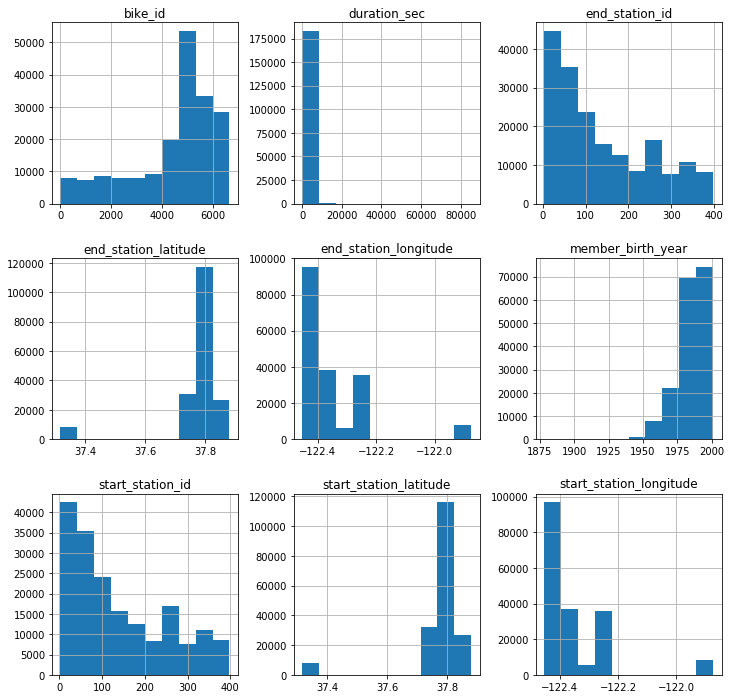

In [10]:
df.hist(figsize=(12,12));

### What is the structure of your dataset?

> so we have 16 features and 183412 trips 

### What is/are the main feature(s) of interest in your dataset?

> I'm interested in finding who used the bike for longer time, is it male or female or other, and how old are

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think duration seconds will help me and the user type and the member birth year

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

## check how many subscribers and customers with the percentege? 

In [11]:
df['user_type'].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [12]:
df['user_type'].value_counts(normalize=True)

Subscriber    0.891676
Customer      0.108324
Name: user_type, dtype: float64

### from the following results we notice that we have :
#### 163544 subscriber with 89% of the users 
#### and 19868 customer with 11% of the users

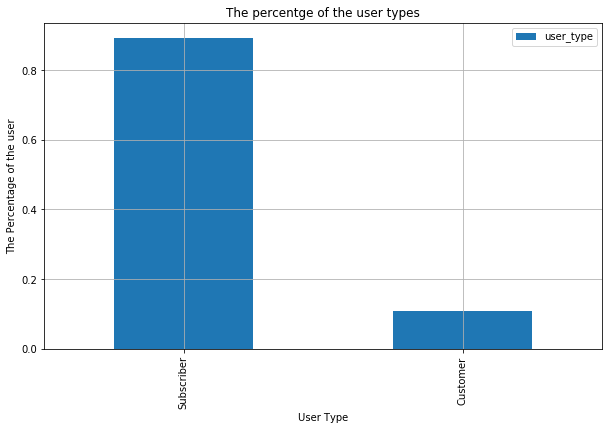

In [30]:
df['user_type'].value_counts(normalize=True).plot(kind='bar',figsize=(10,6))
plt.title('The percentge of the user types')
plt.xlabel('User Type')
plt.ylabel('The Percentage of the user')
plt.legend() ## if needed
plt.grid();

#### from the chart we can notice there is a huge difference between subscribers and customers, subscribers are 89% of the users 
#### But that doesn't mean they use the bike most of the time 

## Who are use the bike the longest time? are they the subscribers or the customers?

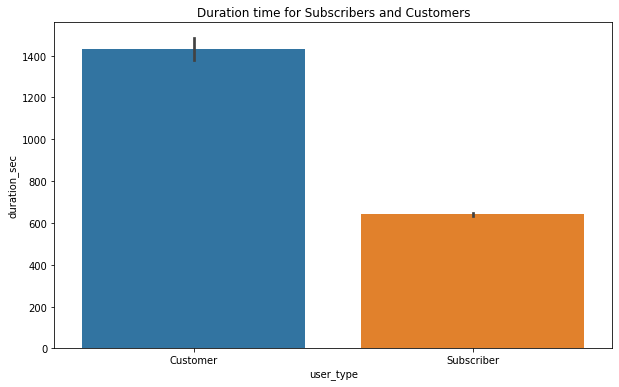

In [14]:
# creating a chart using seaborn library to answer this question 
plt.figure(figsize=(10,6))
sb.barplot(x='user_type',y='duration_sec',data=df)
plt.title('Duration time for Subscribers and Customers')
plt.show()

#### from the previous chart, we notice there is a lot of time difference betweeen the customers and the subscribers 
#### we can see that there 89% of the users are subscribers but they don't use the bike the most, where the customers uses the bikes for longer time

## who uses the bike most? male or female or other?

In [15]:
df['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [16]:
df['member_gender'].value_counts(normalize=True)

Male      0.745951
Female    0.233198
Other     0.020851
Name: member_gender, dtype: float64

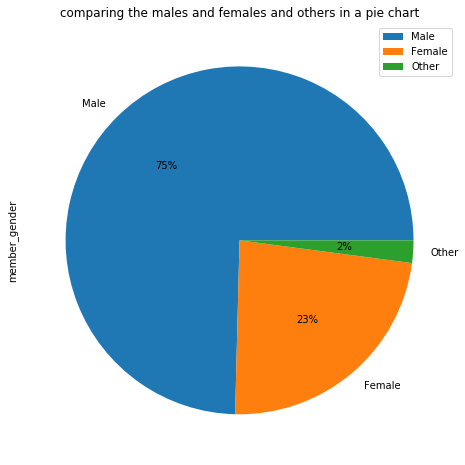

In [17]:
plt.figure(figsize=(9,9))
df['member_gender'].value_counts(normalize=True).plot(kind='pie',figsize=(10,8), autopct='%1.0f%%')
plt.title('comparing the males and females and others in a pie chart')
plt.legend();

from the previous pie chart we can see that most of the users in the dataset we have are male users, with the 75% and it's a lot of difference to female and other where female as we can see 23% and the others are 2% of the users 

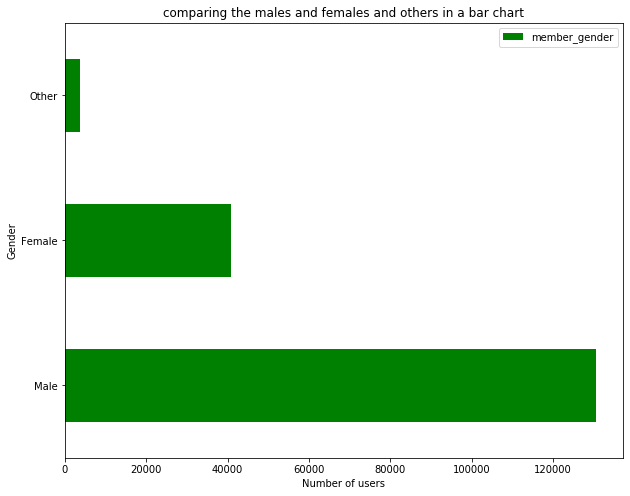

In [18]:
df['member_gender'].value_counts(normalize=False).plot(kind='barh',figsize=(10,8),color='g')
plt.title('comparing the males and females and others in a bar chart')
plt.xlabel('Number of users')
plt.ylabel('Gender')
plt.legend();

### from the following results we notice that there is a lot of difference between male and female and other 
#### and we already calculated the percenteg 
#### where the male are 130651 with 75% 
#### and the female are 40844 with 23% 
#### and other are 3652 with 2% of the users 
#### obvuisly there is a clear picture that is the males uses the bikes most than females and others 

In [19]:
# adding an Age column
df['Age']= (2020 - df['member_birth_year'])

In [20]:
## finding the mean of age
df['Age'].describe()

count    175147.000000
mean         35.193563
std          10.116689
min          19.000000
25%          28.000000
50%          33.000000
75%          40.000000
max         142.000000
Name: Age, dtype: float64

#### we notice there is a max value of 142 year and it's seem an outlier of this data set so we gonna drop it?

In [21]:
df[df['Age']== 142]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Age
27370,1474,2019-02-25 09:28:42.161,2019-02-25 09:53:17.068,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,386.0,24th St at Bartlett St,37.752105,-122.419724,6436,Customer,1878.0,Female,No,142.0


In [22]:
df = df.drop([27370])

In [23]:
## finding the mean of age
df['Age'].describe()

count    175146.000000
mean         35.192953
std          10.113498
min          19.000000
25%          28.000000
50%          33.000000
75%          40.000000
max         120.000000
Name: Age, dtype: float64

#### now it makes more sense, but still the mean didn't change that much so it didn't affect out results

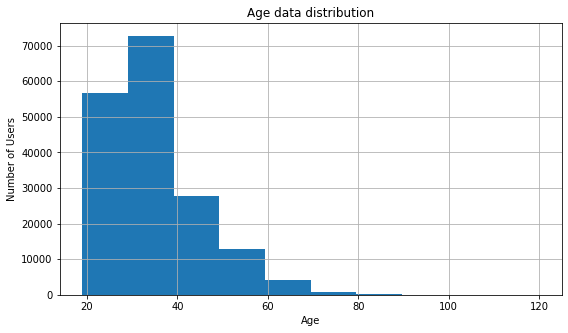

In [24]:
df['Age'].hist(figsize=(9,5))
plt.title('Age data distribution')
plt.xlabel('Age')
plt.ylabel('Number of Users');

#### we can notice from the histogram that is most of the users are between 20 to 40 years old 
#### also the average of age is 35.19 years

## Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Yes I noticed a 142 year at the age column, and that's mean the person was born on 1878, so I dropped that value 


## Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes I added a new column which is the age column, to know how old are the users and what's the average age
also changed the starting time and ending time data type to datetime type 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

## Check the duration time vs the age

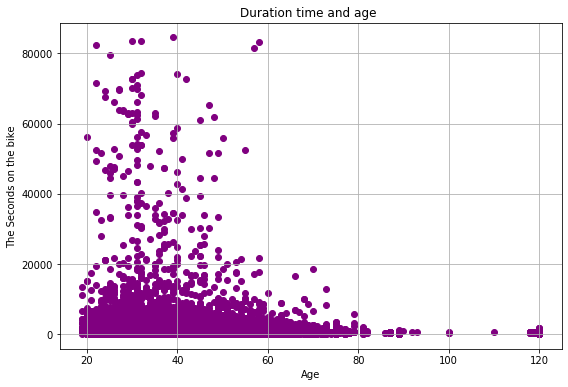

In [25]:
## we already added the age column before so we will use it here agign
plt.figure(figsize=(9,6))
plt.scatter( df['Age'],df['duration_sec'],color='purple',)
plt.title('Duration time and age ')
plt.grid()
plt.xlabel('Age')
plt.ylabel('The Seconds on the bike')
plt.show()

from the previous visualization, what we can notice that the people who are aged from 25 to 35, they spend a lot of time using the bike with nearly 40,000 seconds
but in general we can notice most of them are from 20 to 45 but specificlly from 25 to 35 

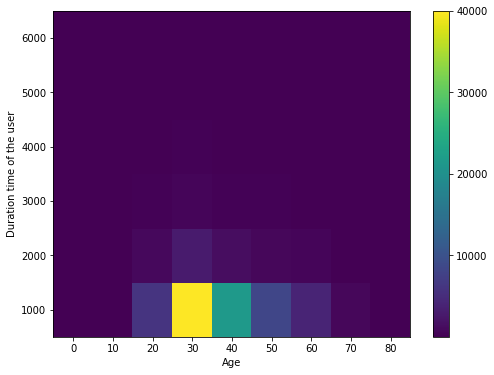

In [26]:
plt.figure(figsize=[8, 6])
bins_y = np.arange(500, 6500+1, 1000)
bins_x = np.arange(-5, 85+1, 10)
plt.hist2d((df['Age']), df['duration_sec'],
           bins = [bins_x, bins_y])
plt.colorbar(ticks=[10000, 20000, 30000, 40000]);
plt.xlabel('Age')
plt.ylabel('Duration time of the user')
plt.show()

and in this chart just proves that the poeple who spends the most amount of time on the bike are in range from 25 to 35, after comes from 35 to 45 years old

checking the correlation between some of the variables 

## Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

#### notice that the people who are aged from 25 to 35, they spend a lot of time using the bike with nearly 40,000 seconds but in general we can notice most of them are from 20 to 45 but specificlly from 25 to 35
#### the trip duration is really dependendable on the age of the user 

## Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

#### noticed that the subcribers most of them are a bit older than the usaual customers on average 
#### how there is only 2% of the other gender, and what's the reasons behind that

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [26]:
gender_s = [['Male','s'],['Female','v'],['Other','o']]

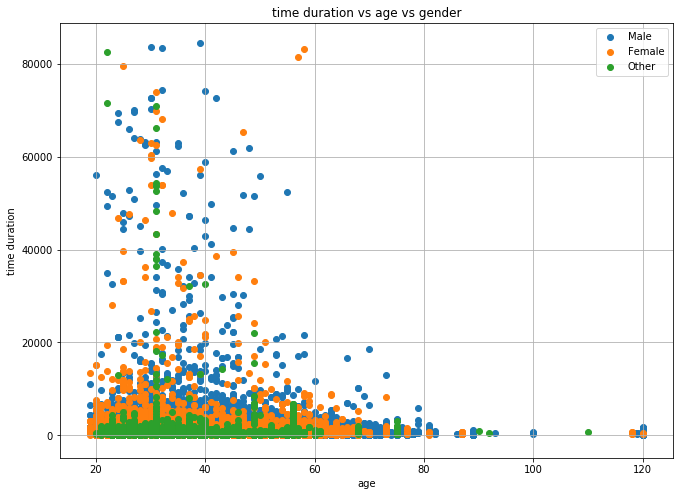

In [115]:
plt.figure(figsize=(11,8))
for gender, s in gender_s:
    df_g=df[df['member_gender']== gender]
    plt.scatter((df_g['Age']),df_g['duration_sec'])
plt.title('time duration vs age vs gender')
plt.xlabel('age')
plt.ylabel('time duration')
plt.grid()
plt.legend(['Male','Female','Other']);

so in this graph, we can see the difference between the genders, amount of time they spend on the bike and the age
we can see clearly that most of the users who spends a longer time on the bikes are males, and it makes sense since we have 75% of the users are males users

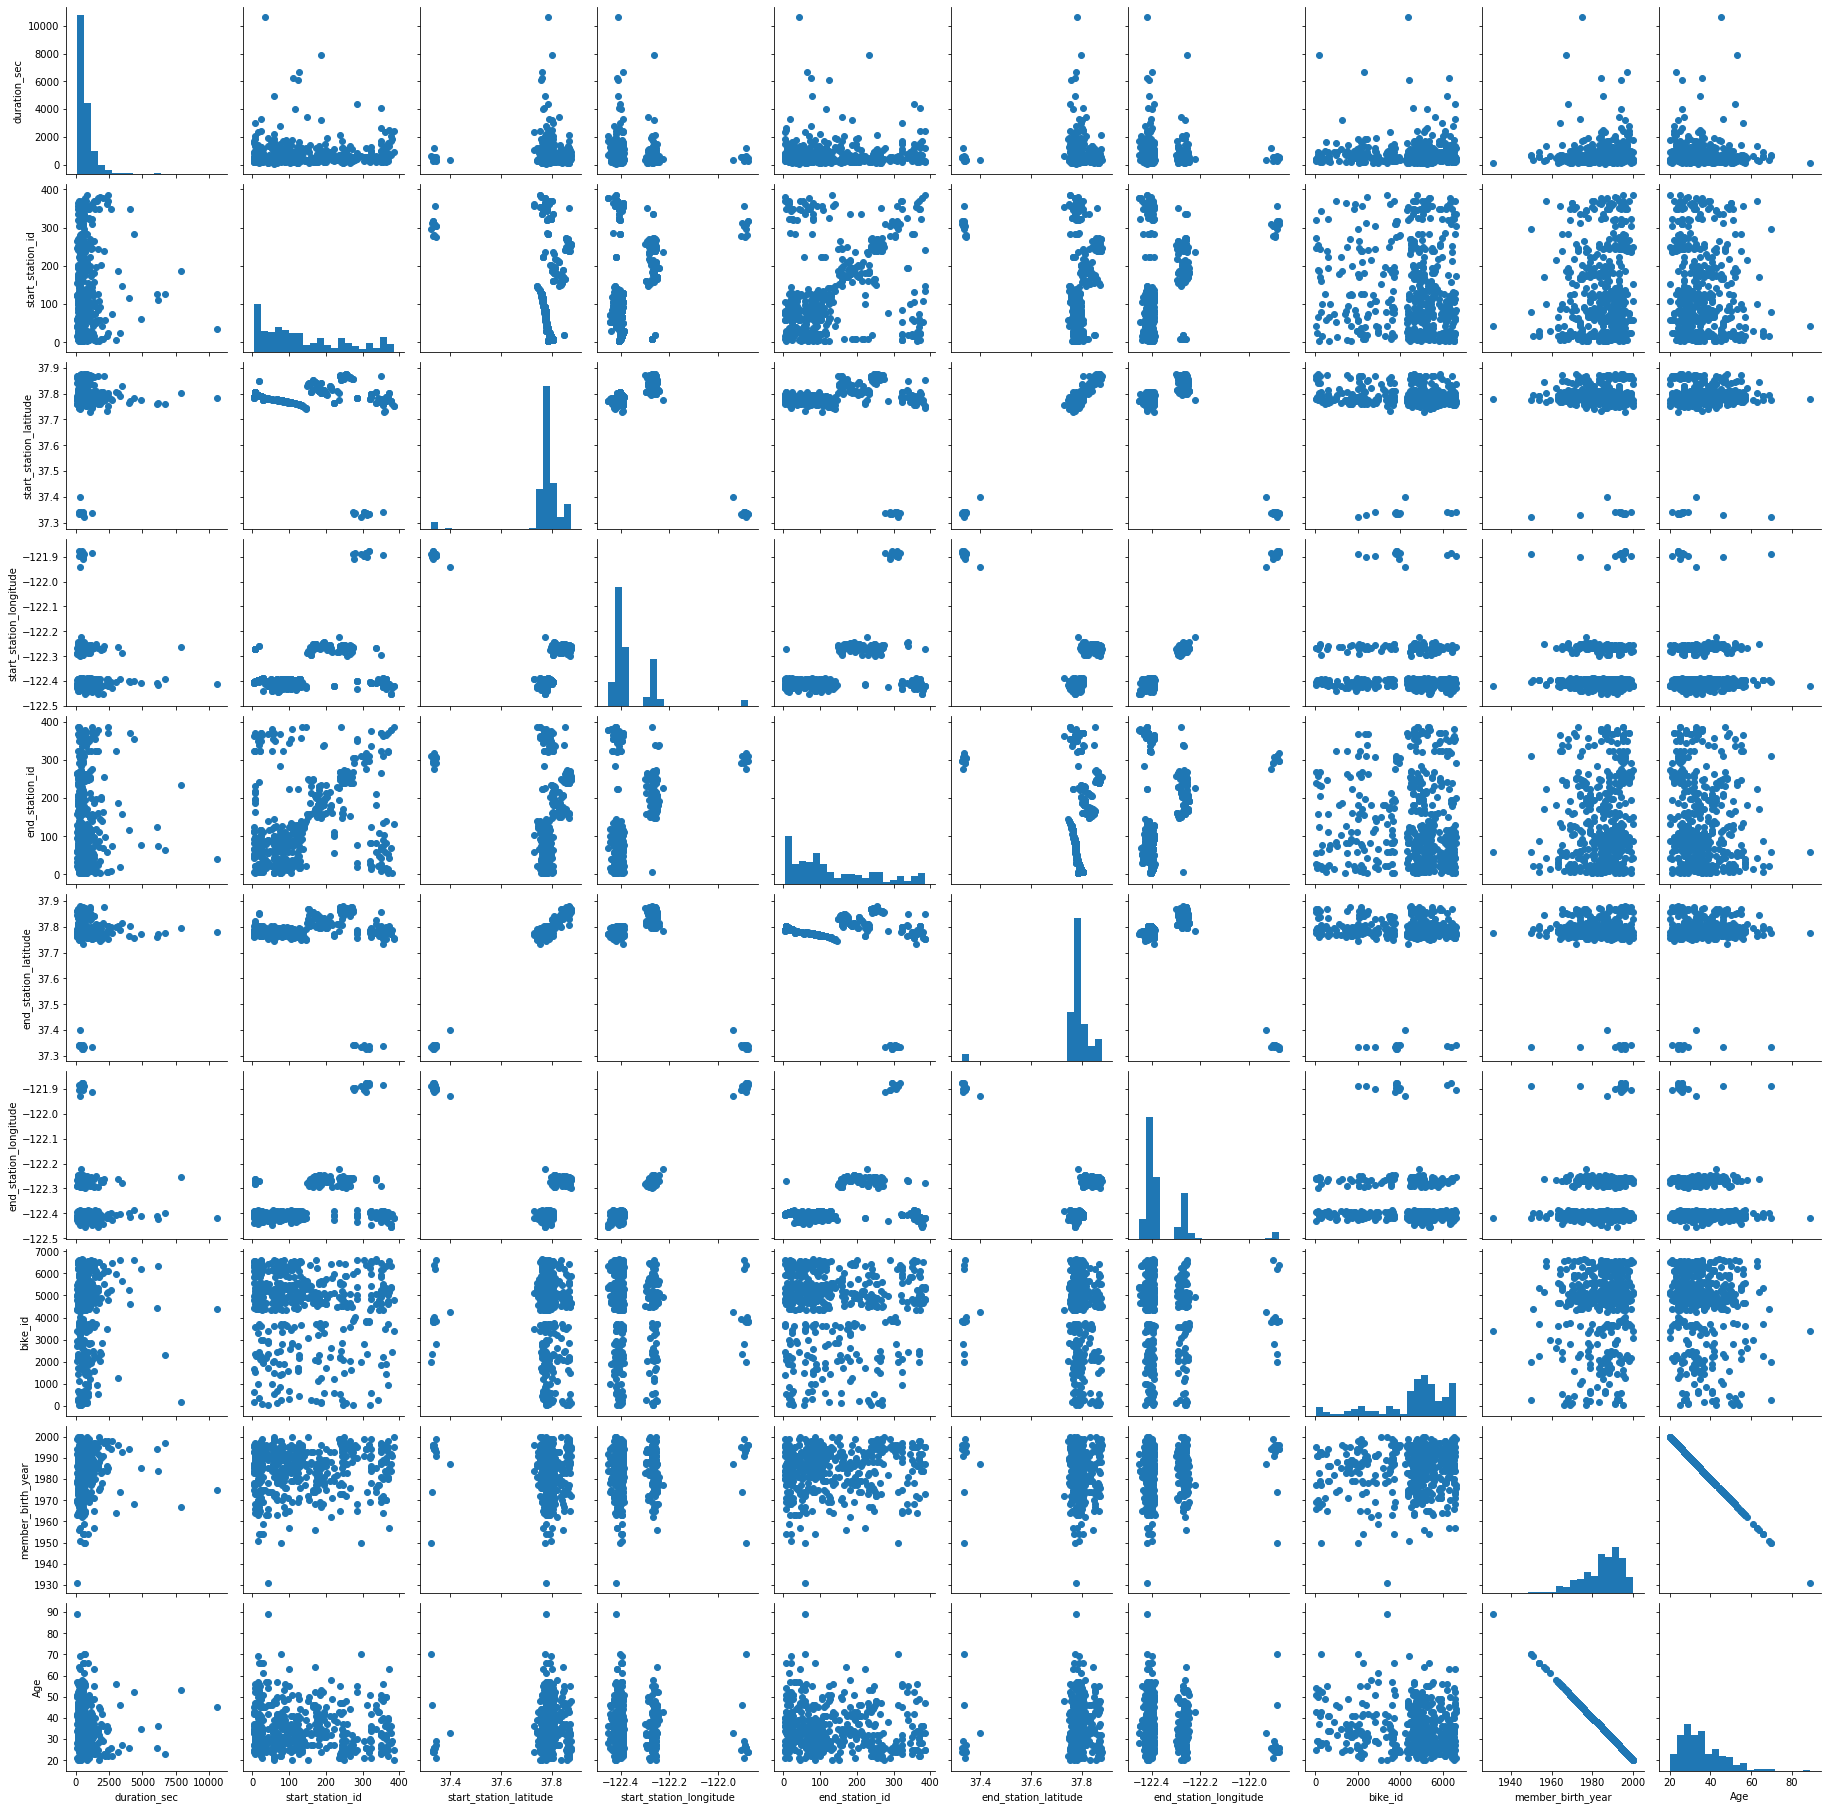

In [27]:
samples = np.random.choice(df.shape[0], 500, replace = False)
df_samp = df.loc[samples,:]

g = sb.PairGrid(data = df_samp)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

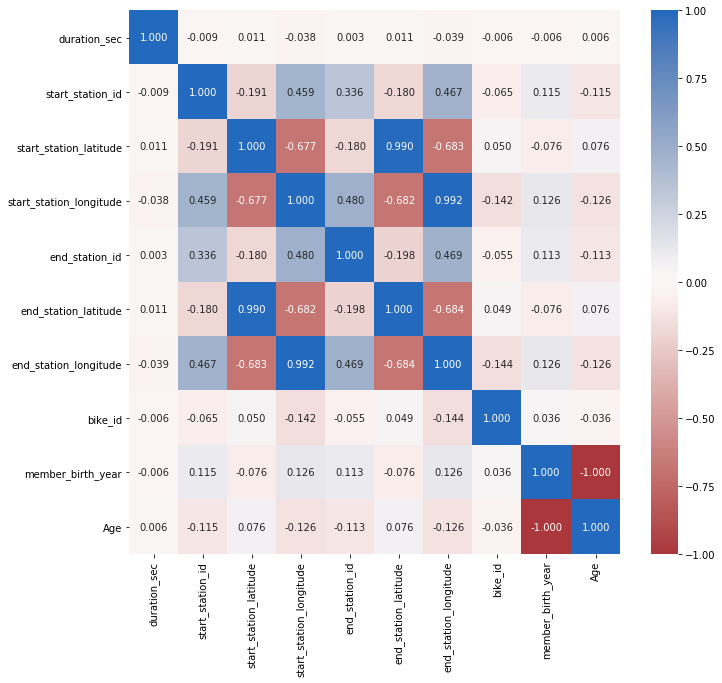

In [28]:
plt.figure(figsize = [11, 10])
sb.heatmap(df.corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

checking the correlation between some of the variables

## Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

#### Yes, we noticed before how most of the users are the male gender, and it the previous graph we can see that also most of the people who spends more time on the bikes are the male 

## Were there any interesting or surprising interactions between features?

#### we noticed from the graph most of the other gender are on 0 time duration, and maybe this is one of the reasons why there is only 2% of useres are Other and not male or female 

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!